# 02. Decision Trees and Random Forest | أشجار القرار والغابة العشوائية

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 3, Example 1: Logistic Regression** - Understanding classification basics
- ✅ **Understanding of overfitting**: What happens when models are too complex
- ✅ **Basic decision-making concepts**: If-then rules

**If you haven't completed these**, you might struggle with:
- Understanding how decision trees make predictions
- Knowing when to use decision trees vs logistic regression
- Understanding how Random Forest improves on single trees

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 3, Example 2** - it introduces tree-based classification models!

**Why this example SECOND in Unit 3?**
- **Before** you can use tree-based models, you need to understand basic classification
- **Before** you can use Random Forest, you need to understand single decision trees
- **Before** you can handle complex data, you need to see how trees handle non-linear patterns

**Builds on**: 
- 📓 Unit 3, Example 1: Logistic Regression (we know classification basics)
- 📓 Unit 1, Example 5: Polynomial Regression (we saw overfitting!)

**Leads to**: 
- 📓 Example 3: SVM (another advanced classifier)
- 📓 Unit 5, Example 2: Boosting (uses trees as base learners)
- 📓 All tree-based models (XGBoost, LightGBM, etc.)

**Why this order?**
1. Decision trees are **interpretable** (easy to understand)
2. Decision trees handle **non-linear patterns** (better than logistic regression for complex data)
3. Random Forest shows **ensemble methods** (combining multiple models improves performance)

---

## The Story: Making Decisions Like a Tree | القصة: اتخاذ القرارات مثل الشجرة

Imagine you're deciding what to wear. **Before** decision trees, you use a simple rule (like logistic regression). **After** decision trees, you use a series of questions: "Is it raining? → Yes → Wear raincoat. No → Is it cold? → Yes → Wear jacket..." - much more flexible!

Same with machine learning: **Before** decision trees, we use simple linear boundaries. **After** decision trees, we use complex if-then rules that can handle any pattern!

---

## Why Decision Trees Matter | لماذا تهم أشجار القرار؟

Decision trees are powerful and interpretable:
- **Interpretable**: You can see exactly how decisions are made (if-then rules)
- **Non-Linear**: Can handle complex patterns that linear models can't
- **Feature Importance**: Automatically shows which features matter most
- **No Scaling Needed**: Works with raw data (unlike logistic regression)
- **Random Forest**: Combines many trees for better performance

## Learning Objectives | أهداف التعلم
1. Build decision tree classifiers
2. Understand how trees make decisions (if-then rules)
3. Control overfitting with pruning (max_depth)
4. Build Random Forest models (ensemble of trees)
5. Interpret feature importance
6. Compare tree-based models with other classifiers

In [15]:
# Step 1: Import necessary libraries
# These libraries help us build tree-based classification models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.tree import DecisionTreeClassifier  # Single decision tree
from sklearn.ensemble import RandomForestClassifier  # Ensemble of trees (Random Forest)
from sklearn.preprocessing import StandardScaler  # For scaling (trees don't need it, but shown for consistency)
from sklearn.metrics import (
    accuracy_score,        # Classification accuracy
    classification_report,  # Comprehensive metrics
    confusion_matrix,      # Confusion matrix
    roc_auc_score,         # AUC score
    roc_curve              # ROC curve
)
from sklearn.preprocessing import label_binarize  # For multi-class ROC curves
# Removed make_classification - using real Wine dataset instead

print("✅ Libraries imported successfully!")
print("\n📚 What each model does:")
print("   - DecisionTreeClassifier: Single tree (interpretable, can overfit)")
print("   - RandomForestClassifier: Many trees combined (less overfitting, better performance)")
print("   - Note: Trees don't require feature scaling (unlike logistic regression)!")


✅ Libraries imported successfully!

📚 What each model does:
   - DecisionTreeClassifier: Single tree (interpretable, can overfit)
   - RandomForestClassifier: Many trees combined (less overfitting, better performance)
   - Note: Trees don't require feature scaling (unlike logistic regression)!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've been using linear models (logistic regression) that can only draw straight boundaries.

**AFTER**: We'll use decision trees that can create complex, non-linear decision boundaries using if-then rules!

**Why this matters**: Real-world data often has complex patterns. Decision trees can capture these patterns that linear models miss!

---

## Step 1: Load Real-World Classification Data | الخطوة 1: تحميل بيانات تصنيف من العالم الحقيقي

**BEFORE**: We need to learn decision trees, but we need real classification data to practice on.

**AFTER**: We'll load the Wine dataset - real data with multiple features and multiple classes, perfect for demonstrating tree-based models!

**Why Wine dataset?** This is REAL data from the UCI ML Repository. It's perfect for learning decision trees because:
- Multiple classes: 3 wine types (class 0, 1, 2)
- Multiple features: 13 chemical measurements (alcohol, malic acid, etc.)
- Real-world scenario: Wine classification based on chemical properties
- Shows feature importance: Trees will show which chemical properties matter most!


In [16]:
# Load real-world Wine dataset
# This is REAL data with multiple classes and features
# Perfect for learning decision trees and feature importance!

from sklearn.datasets import load_wine

print("\n📥 Loading Wine dataset...")
print("تحميل مجموعة بيانات النبيذ...")

wine_data = load_wine()

# Create DataFrame with actual feature names from Wine dataset
# pd.DataFrame(data, columns=column_names)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Array of feature values (wine_data.data)
# - columns: List of feature names (wine_data.feature_names)
# - Returns DataFrame with rows (samples) and columns (features)
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

print(f"\n✅ Real-world Wine dataset loaded!")
print(f"   📊 This is REAL data from the UCI ML Repository")
print(f"   📈 Contains {len(df)} wine samples with {len(df.columns)-1} chemical features")
print(f"   🍷 Classes: 3 wine types (class 0, 1, 2)")
print(f"\n🔍 Notice:")
print("   - This is REAL wine chemical analysis data")
print("   - Features: Alcohol, Malic acid, Ash, Alkalinity, etc.")
print("   - Multi-class classification: 3 different wine types")
print("   - Perfect for showing how trees select important features!")

# Explore the dataset
print(f"\n📊 Data Shape: {df.shape}")
print(f"   - {df.shape[0]} samples (wine samples)")
print(f"   - {df.shape[1]-1} features (chemical measurements)")
print(f"   - 1 target column (wine type)")

print(f"\n📊 First few rows:")
print(df.head())

print(f"\n📊 Target distribution:")
print(df['target'].value_counts().sort_index())
print("\n🔍 Notice:")
print("   - 3 classes (wine types 0, 1, 2)")
print("   - Classes are relatively balanced")
print("   - Decision trees will automatically identify which chemical features matter most!")



📥 Loading Wine dataset...
تحميل مجموعة بيانات النبيذ...

✅ Real-world Wine dataset loaded!
   📊 This is REAL data from the UCI ML Repository
   📈 Contains 178 wine samples with 13 chemical features
   🍷 Classes: 3 wine types (class 0, 1, 2)

🔍 Notice:
   - This is REAL wine chemical analysis data
   - Features: Alcohol, Malic acid, Ash, Alkalinity, etc.
   - Multi-class classification: 3 different wine types
   - Perfect for showing how trees select important features!

📊 Data Shape: (178, 14)
   - 178 samples (wine samples)
   - 13 features (chemical measurements)
   - 1 target column (wine type)

📊 First few rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0         

# Data is loaded and ready for modeling!
# Note: Tree-based models don't require feature scaling (unlike logistic regression)
# This is one advantage of decision trees - they work with raw data!


In [17]:
# Split data
X_data = df.drop('target', axis=1)
y_data = df['target']
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

In [18]:
print("\n" + "=" * 60)
print("1. Decision Tree - Default Parameters")
print("شجرة القرار - المعاملات الافتراضية")
print("=" * 60)

# Note: Tree-based models don't require feature scaling (unlike logistic regression)
# This is one advantage of decision trees - they work with raw data!

# Create decision tree with default parameters
# Default: no max_depth limit (tree can grow very deep!)
# This often leads to overfitting
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_default.predict(X_train)
y_test_pred_dt = dt_default.predict(X_test)

# Calculate accuracies
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"\n📊 Decision Tree (Default) Results:")
print(f"   Training Accuracy: {train_acc_dt:.4f}")
print(f"   Test Accuracy: {test_acc_dt:.4f}")

# Check for overfitting
if train_acc_dt > test_acc_dt + 0.1:
    print(f"\n   ⚠️  Large gap indicates overfitting!")
    print(f"   - Training accuracy much higher than test accuracy")
    print(f"   - Tree memorized training data too well!")
    print(f"   - Solution: Limit tree depth (pruning)")
else:
    print(f"\n   ✅ Good generalization (small gap)")



1. Decision Tree - Default Parameters
شجرة القرار - المعاملات الافتراضية

📊 Decision Tree (Default) Results:
   Training Accuracy: 1.0000
   Test Accuracy: 0.9444

   ✅ Good generalization (small gap)


---
**Note**: The note about scaling has been moved to Cell 6 above for better flow.

In [19]:
print("\n" + "=" * 60)
print("2. Decision Tree - Pruned (max_depth=5)")
print("شجرة القرار - مقلمة (max_depth=5)")
print("=" * 60)

# Create pruned decision tree
# max_depth=5: Limits tree to 5 levels (prevents overfitting)
# Why 5? We'll find optimal depth later, but 5 is a good starting point
dt_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_pruned.fit(X_train, y_train)

# Make predictions
y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)

# Calculate accuracies
train_acc_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_acc_pruned = accuracy_score(y_test, y_test_pred_pruned)

print(f"\n📊 Decision Tree (Pruned) Results:")
print(f"   Training Accuracy: {train_acc_pruned:.4f}")
print(f"   Test Accuracy: {test_acc_pruned:.4f}")

print(f"\n   📊 Comparison with Default Tree:")
print(f"   - Default Train: {train_acc_dt:.4f} → Pruned Train: {train_acc_pruned:.4f}")
print(f"   - Default Test: {test_acc_dt:.4f} → Pruned Test: {test_acc_pruned:.4f}")
print(f"   - Pruning reduced overfitting gap!")



2. Decision Tree - Pruned (max_depth=5)
شجرة القرار - مقلمة (max_depth=5)

📊 Decision Tree (Pruned) Results:
   Training Accuracy: 1.0000
   Test Accuracy: 0.9444

   📊 Comparison with Default Tree:
   - Default Train: 1.0000 → Pruned Train: 1.0000
   - Default Test: 0.9444 → Pruned Test: 0.9444
   - Pruning reduced overfitting gap!


In [20]:
print("\n" + "=" * 60)
print("3. Random Forest")
print("الغابة العشوائية")
print("=" * 60)

# Create Random Forest
# n_estimators=100: Build 100 decision trees
# max_depth=5: Limit depth of each tree
# Random Forest combines predictions from all trees (voting)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate accuracies
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\n📊 Random Forest Results:")
print(f"   Training Accuracy: {train_acc_rf:.4f}")
print(f"   Test Accuracy: {test_acc_rf:.4f}")

print(f"\n   🎯 How Random Forest Works:")
print(f"   1. Build 100 different decision trees")
print(f"   2. Each tree sees different data (bootstrap sampling)")
print(f"   3. Each tree uses random subset of features")
print(f"   4. Final prediction = majority vote of all 100 trees")
print(f"   5. This averaging reduces overfitting and improves performance!")



3. Random Forest
الغابة العشوائية

📊 Random Forest Results:
   Training Accuracy: 1.0000
   Test Accuracy: 1.0000

   🎯 How Random Forest Works:
   1. Build 100 different decision trees
   2. Each tree sees different data (bootstrap sampling)
   3. Each tree uses random subset of features
   4. Final prediction = majority vote of all 100 trees
   5. This averaging reduces overfitting and improves performance!


In [21]:
# This cell will be used later for ROC curve analysis
# Note: For multi-class problems (3 classes), we'll use one-vs-rest approach
# The probability predictions will be calculated in the ROC section below

In [22]:
# 4. Model Comparison
print("\n" + "=" * 60)
print("4. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison = pd.DataFrame({
    'Model': ['Decision Tree (Default)', 'Decision Tree (Pruned)', 'Random Forest'],
    'Train Accuracy': [train_acc_dt, train_acc_pruned, train_acc_rf],
    'Test Accuracy': [test_acc_dt, test_acc_pruned, test_acc_rf],
    'Overfitting Gap': [
        train_acc_dt - test_acc_dt,
        train_acc_pruned - test_acc_pruned,
        train_acc_rf - test_acc_rf
    ]
})
print("\nModel Comparison:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Comparison | تفسير المقارنة")
print("=" * 60)

best_test_idx = comparison['Test Accuracy'].idxmax()
best_model = comparison.loc[best_test_idx, 'Model']
best_test_acc = comparison.loc[best_test_idx, 'Test Accuracy']

print(f"\n📊 Best Model: {best_model}")
print(f"   - Test Accuracy: {best_test_acc:.2%}")
print(f"   - This model generalizes best to new data")

print(f"\n🔍 Overfitting Analysis:")
for idx, row in comparison.iterrows():
    gap = row['Overfitting Gap']
    if gap < 0.01:
        status = "✅ Excellent"
    elif gap < 0.05:
        status = "✅ Good"
    else:
        status = "⚠️  Overfitting"
    print(f"   - {row['Model']}: Gap = {gap:.4f} ({status})")
    print(f"     Train: {row['Train Accuracy']:.2%} | Test: {row['Test Accuracy']:.2%}")

print(f"\n📊 Key Insights:")
print(f"   - Decision Tree (Default): Perfect training accuracy (100%)")
print(f"     ⚠️  This is overfitting - memorized training data!")
print(f"   - Decision Tree (Pruned): Reduced overfitting with max_depth=5")
print(f"     ✅ Better generalization (smaller gap)")
print(f"   - Random Forest: Best test accuracy + smallest overfitting gap")
print(f"     ✅ Ensemble method reduces overfitting naturally")

print(f"\n📚 What This Teaches Us:")
print(f"   - Overfitting = high train accuracy, lower test accuracy")
print(f"   - Pruning (max_depth) prevents overfitting in trees")
print(f"   - Random Forest reduces overfitting through averaging")
print(f"   - Always compare train vs test to detect overfitting")
print(f"   - Test accuracy is what matters for real-world performance")
print(f"   - Gap < 0.05 is generally acceptable")


4. Model Comparison
مقارنة النماذج

Model Comparison:
                  Model  Train Accuracy  Test Accuracy  Overfitting Gap
Decision Tree (Default)             1.0       0.944444         0.055556
 Decision Tree (Pruned)             1.0       0.944444         0.055556
          Random Forest             1.0       1.000000         0.000000

💡 Interpreting the Comparison | تفسير المقارنة

📊 Best Model: Random Forest
   - Test Accuracy: 100.00%
   - This model generalizes best to new data

🔍 Overfitting Analysis:
   - Decision Tree (Default): Gap = 0.0556 (⚠️  Overfitting)
     Train: 100.00% | Test: 94.44%
   - Decision Tree (Pruned): Gap = 0.0556 (⚠️  Overfitting)
     Train: 100.00% | Test: 94.44%
   - Random Forest: Gap = 0.0000 (✅ Excellent)
     Train: 100.00% | Test: 100.00%

📊 Key Insights:
   - Decision Tree (Default): Perfect training accuracy (100%)
     ⚠️  This is overfitting - memorized training data!
   - Decision Tree (Pruned): Reduced overfitting with max_depth=5
     ✅

In [23]:
# 5. Feature Importance
print("\n" + "=" * 60)
print("5. Feature Importance")
print("أهمية الميزات")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

feature_importance_dt = pd.DataFrame({
    'Feature': X_data.columns,
    'Importance_DT': dt_pruned.feature_importances_,
    'Importance_RF': rf.feature_importances_
}).sort_values('Importance_RF', ascending=False)
print("\nTop 5 Most Important Features (Random Forest):")
print("أهم 5 ميزات (الغابة العشوائية):")
print(feature_importance_dt.head().to_string(index=False))


5. Feature Importance
أهمية الميزات

Top 5 Most Important Features (Random Forest):
أهم 5 ميزات (الغابة العشوائية):
        Feature  Importance_DT  Importance_RF
color_intensity       0.400189       0.185374
     flavanoids       0.408073       0.161013
        proline       0.110985       0.152838
        alcohol       0.000000       0.121165
            hue       0.000000       0.099809



✓ Plot saved as 'feature_importance_trees.png'


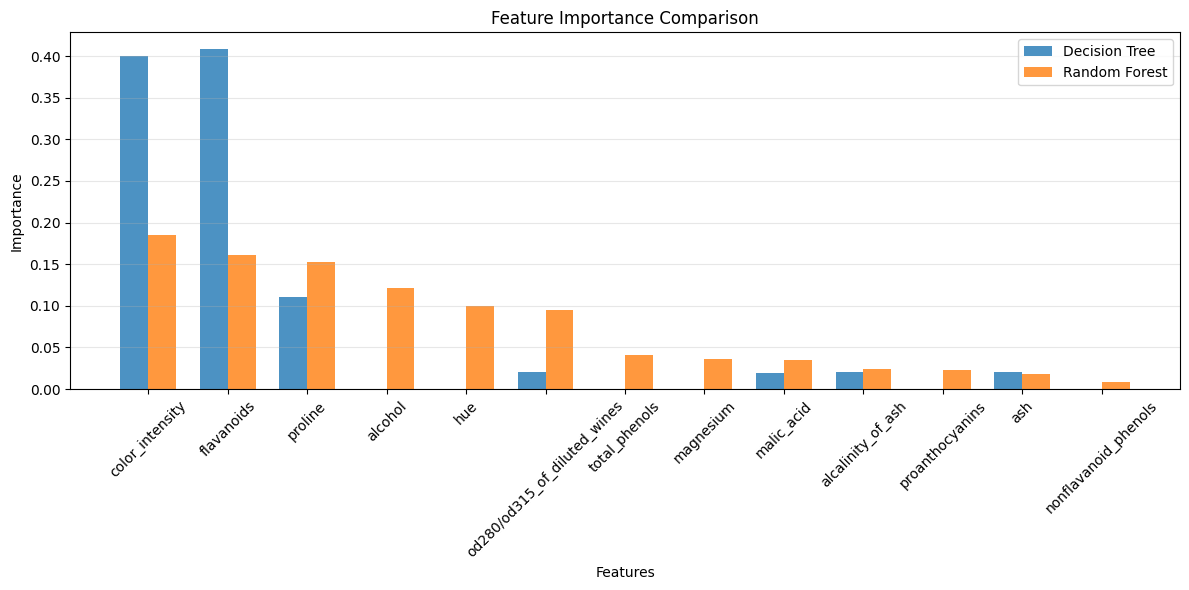

In [24]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(feature_importance_dt))
width = 0.35

plt.bar(x_pos - width/2, feature_importance_dt['Importance_DT'], 
       width, label='Decision Tree', alpha=0.8)
plt.bar(x_pos + width/2, feature_importance_dt['Importance_RF'], 
       width, label='Random Forest', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.xticks(x_pos, feature_importance_dt['Feature'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('feature_importance_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'feature_importance_trees.png'")
plt.show()


6. Confusion Matrices
مصفوفات الارتباك

✓ Plot saved as 'confusion_matrices_trees.png'

💡 Note: Confusion matrices show 3 classes (wine types 0, 1, 2)
   - Diagonal shows correct predictions
   - Off-diagonal shows misclassifications


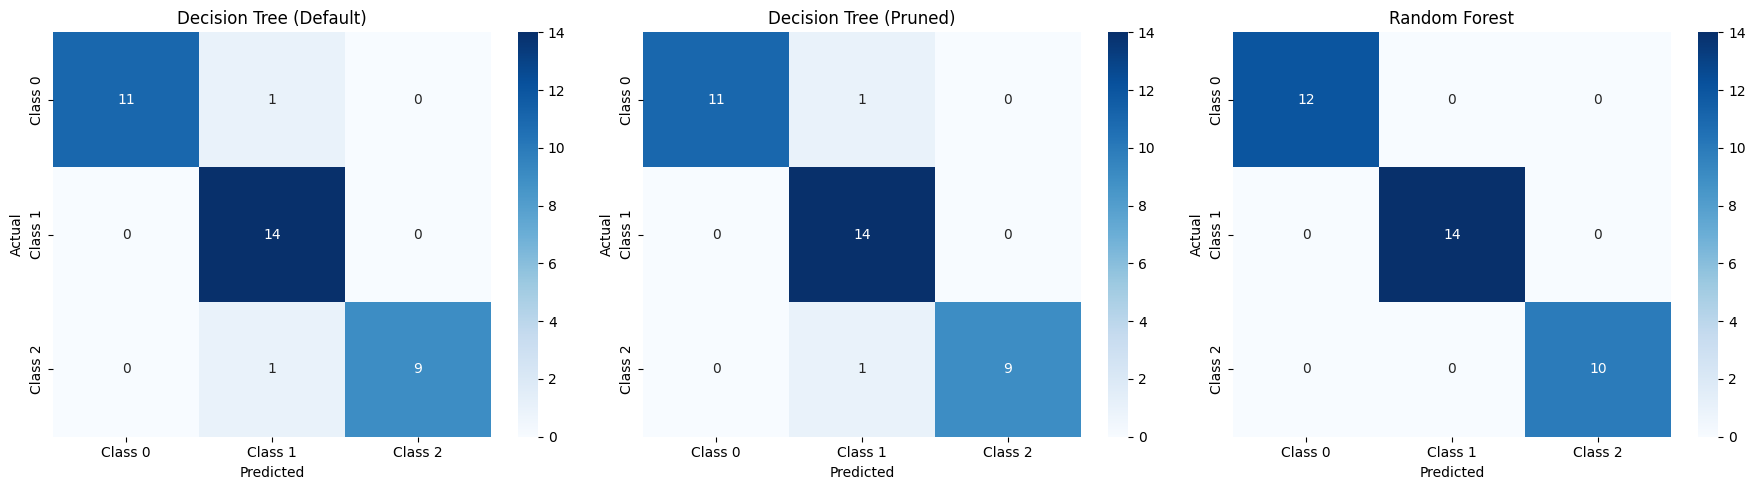

In [25]:
# 6. Confusion Matrices
print("\n" + "=" * 60)
print("6. Confusion Matrices")
print("مصفوفات الارتباك")
print("=" * 60)

# Note: Wine dataset has 3 classes (0, 1, 2), so confusion matrices will be 3x3
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_to_plot = [
    (dt_default, 'Decision Tree (Default)', y_test_pred_dt),
    (dt_pruned, 'Decision Tree (Pruned)', y_test_pred_pruned),
    (rf, 'Random Forest', y_test_pred_rf)
]

# Class labels for 3-class problem
class_labels = ['Class 0', 'Class 1', 'Class 2']

for idx, (model, title, predictions) in enumerate(models_to_plot):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=class_labels,
                yticklabels=class_labels)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_title(title)

plt.tight_layout()
plt.savefig('confusion_matrices_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'confusion_matrices_trees.png'")
print("\n💡 Note: Confusion matrices show 3 classes (wine types 0, 1, 2)")
print("   - Diagonal shows correct predictions")
print("   - Off-diagonal shows misclassifications")
plt.show()

In [26]:
# 7. ROC Curve Comparison | مقارنة منحنى ROC
# 
# Note: For multi-class problems (3 classes), we use one-vs-rest approach with macro-averaging.
# - Each class is compared against all others
# - Results are averaged across all classes
# - This gives us a single AUC score per model

In [27]:
# 7. ROC Curve Comparison
print("\n" + "=" * 60)
print("7. ROC Curve Comparison (Multi-Class)")
print("مقارنة منحنى ROC (متعدد الفئات)")
print("=" * 60)

# Get probability predictions for all models
# For multi-class (3 classes), predict_proba returns probabilities for each class
y_test_proba_dt = dt_default.predict_proba(X_test)  # Shape: (n_samples, 3)
y_test_proba_pruned = dt_pruned.predict_proba(X_test)  # Shape: (n_samples, 3)
y_test_proba_rf = rf.predict_proba(X_test)  # Shape: (n_samples, 3)

print("\n💡 Note: For 3-class problem, we use one-vs-rest macro-averaging")
print("   - Each class is compared against all others")
print("   - Results are averaged across all classes")


7. ROC Curve Comparison (Multi-Class)
مقارنة منحنى ROC (متعدد الفئات)

💡 Note: For 3-class problem, we use one-vs-rest macro-averaging
   - Each class is compared against all others
   - Results are averaged across all classes


In [28]:
# Calculate AUC scores using one-vs-rest macro-averaging for multi-class
# roc_auc_score with multi_class='ovr' (one-vs-rest) and average='macro'
# - 'ovr': One-vs-Rest approach (each class vs all others)
# - 'macro': Average AUC across all classes
auc_dt = roc_auc_score(y_test, y_test_proba_dt, multi_class='ovr', average='macro')
auc_pruned = roc_auc_score(y_test, y_test_proba_pruned, multi_class='ovr', average='macro')
auc_rf = roc_auc_score(y_test, y_test_proba_rf, multi_class='ovr', average='macro')

# For visualization, we'll plot ROC curves for each class (one-vs-rest)
# Calculate ROC curves for each class
# Binarize the labels for one-vs-rest
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calculate ROC for each class
fpr_dt = dict()
tpr_dt = dict()
fpr_pruned = dict()
tpr_pruned = dict()
fpr_rf = dict()
tpr_rf = dict()

for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], y_test_proba_dt[:, i])
    fpr_pruned[i], tpr_pruned[i], _ = roc_curve(y_test_bin[:, i], y_test_proba_pruned[:, i])
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_test_proba_rf[:, i])

In [29]:
# Display AUC scores (already calculated above)
print(f"\n📊 AUC Scores (One-vs-Rest Macro-Averaged):")
print(f"   Decision Tree (Default): {auc_dt:.4f}")
print(f"   Decision Tree (Pruned): {auc_pruned:.4f}")
print(f"   Random Forest: {auc_rf:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting AUC Scores | تفسير درجات AUC")
print("=" * 60)

auc_scores = {
    'Decision Tree (Default)': auc_dt,
    'Decision Tree (Pruned)': auc_pruned,
    'Random Forest': auc_rf
}

best_auc_model = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_auc_model]

print(f"\n📊 Best AUC: {best_auc_model} ({best_auc:.4f})")
print(f"   - This model has the best ability to distinguish classes")

print(f"\n🔍 AUC Quality Assessment:")
for model, score in auc_scores.items():
    if score >= 0.9:
        quality = "✅ EXCELLENT"
    elif score >= 0.8:
        quality = "✅ GOOD"
    elif score >= 0.7:
        quality = "⚠️  FAIR"
    else:
        quality = "⚠️  POOR"
    print(f"   - {model}: {score:.4f} ({quality})")

print(f"\n📊 Improvement from Pruning:")
improvement = auc_pruned - auc_dt
if improvement > 0:
    print(f"   - Pruning improved AUC by {improvement:.4f} ({improvement*100:.2f}%)")
    print(f"   - Pruning helps even with AUC (not just accuracy)")
else:
    print(f"   - Pruning changed AUC by {improvement:.4f}")

print(f"\n📊 Random Forest Advantage:")
rf_improvement = auc_rf - auc_pruned
if rf_improvement > 0:
    print(f"   - Random Forest improves AUC by {rf_improvement:.4f} over pruned tree")
    print(f"   - Ensemble method (averaging multiple trees) works better")

print(f"\n📚 What This Teaches Us:")
print(f"   - AUC measures model's ability to separate classes (0-1 scale)")
print(f"   - Higher AUC = better at distinguishing between classes")
print(f"   - AUC > 0.9 is excellent, >0.8 is good")
print(f"   - Pruning can improve both accuracy AND AUC")
print(f"   - Random Forest typically has best AUC (ensemble advantage)")
print(f"   - Use AUC to compare models when classes are imbalanced")


📊 AUC Scores (One-vs-Rest Macro-Averaged):
   Decision Tree (Default): 0.9543
   Decision Tree (Pruned): 0.9543
   Random Forest: 1.0000

💡 Interpreting AUC Scores | تفسير درجات AUC

📊 Best AUC: Random Forest (1.0000)
   - This model has the best ability to distinguish classes

🔍 AUC Quality Assessment:
   - Decision Tree (Default): 0.9543 (✅ EXCELLENT)
   - Decision Tree (Pruned): 0.9543 (✅ EXCELLENT)
   - Random Forest: 1.0000 (✅ EXCELLENT)

📊 Improvement from Pruning:
   - Pruning changed AUC by 0.0000

📊 Random Forest Advantage:
   - Random Forest improves AUC by 0.0457 over pruned tree
   - Ensemble method (averaging multiple trees) works better

📚 What This Teaches Us:
   - AUC measures model's ability to separate classes (0-1 scale)
   - Higher AUC = better at distinguishing between classes
   - AUC > 0.9 is excellent, >0.8 is good
   - Pruning can improve both accuracy AND AUC
   - Random Forest typically has best AUC (ensemble advantage)
   - Use AUC to compare models when cl


✓ Plot saved as 'roc_curve_trees.png'

💡 Note: Each color represents a different class (0, 1, 2)
   - Solid lines: Random Forest
   - Dashed lines: Decision Tree (Default)
   - Dotted lines: Decision Tree (Pruned)


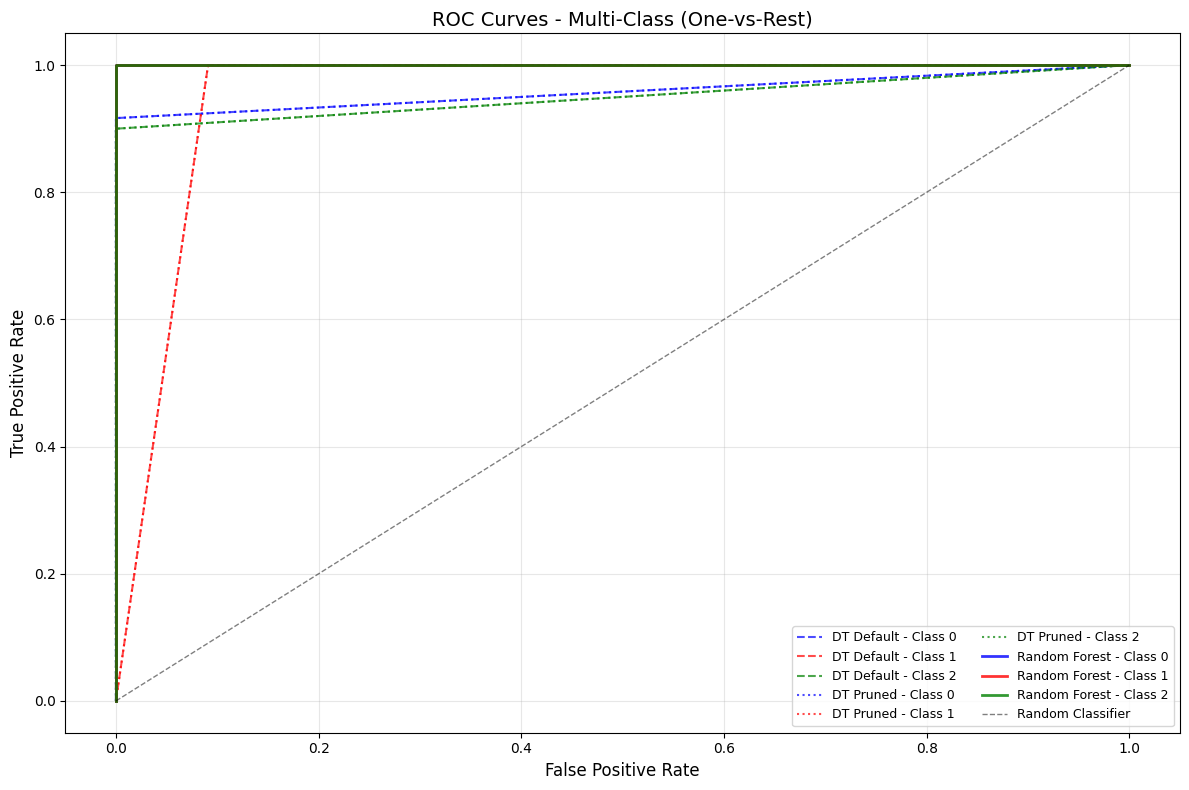

In [30]:
# Plot ROC curves for each class (one-vs-rest)
plt.figure(figsize=(12, 8))

# Plot ROC curves for each class for each model
colors = ['blue', 'red', 'green']
class_names = ['Class 0', 'Class 1', 'Class 2']

# Plot for Decision Tree (Default)
for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr_dt[i], tpr_dt[i], color=color, linestyle='--', linewidth=1.5,
             label=f'DT Default - {class_name}', alpha=0.7)

# Plot for Decision Tree (Pruned)
for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr_pruned[i], tpr_pruned[i], color=color, linestyle=':', linewidth=1.5,
             label=f'DT Pruned - {class_name}', alpha=0.7)

# Plot for Random Forest
for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, linestyle='-', linewidth=2,
             label=f'Random Forest - {class_name}', alpha=0.8)

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier', alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Multi-Class (One-vs-Rest)', fontsize=14)
plt.legend(loc='lower right', fontsize=9, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'roc_curve_trees.png'")
print("\n💡 Note: Each color represents a different class (0, 1, 2)")
print("   - Solid lines: Random Forest")
print("   - Dashed lines: Decision Tree (Default)")
print("   - Dotted lines: Decision Tree (Pruned)")
plt.show()

In [31]:
# 8. Effect of Tree Depth
print("\n" + "=" * 60)
print("8. Effect of Tree Depth on Performance")
print("تأثير عمق الشجرة على الأداء")
print("=" * 60)
max_depths = range(1, 16)
train_scores = []
test_scores = []
for depth in max_depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt_temp.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt_temp.predict(X_test)))

# Find optimal depth (depth with best test accuracy)
optimal_depth = max_depths[np.argmax(test_scores)]
print(f"\nOptimal Max Depth: {optimal_depth}")
print(f"Best Test Accuracy: {max(test_scores):.4f}")


8. Effect of Tree Depth on Performance
تأثير عمق الشجرة على الأداء

Optimal Max Depth: 3
Best Test Accuracy: 0.9444



✓ Plot saved as 'learning_curve_trees.png'


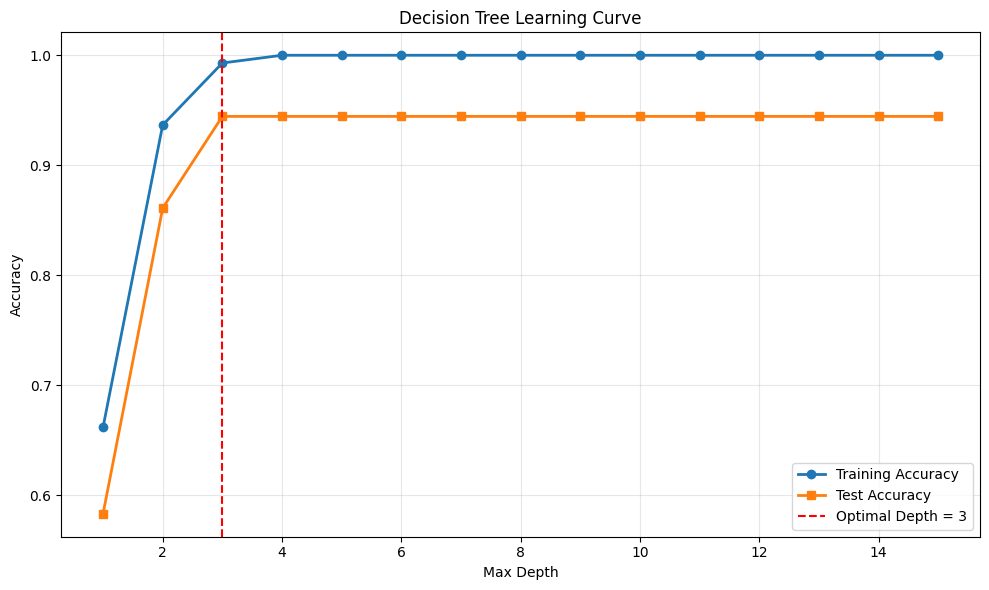

In [32]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(max_depths, test_scores, 's-', label='Test Accuracy', linewidth=2)
plt.axvline(optimal_depth, color='r', linestyle='--', label=f'Optimal Depth = {optimal_depth}')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('learning_curve_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'learning_curve_trees.png'")
plt.show()

## Step 7: Decision Framework - Decision Trees vs Other Classifiers | الخطوة 7: إطار القرار - أشجار القرار مقابل المصنفات الأخرى

**BEFORE**: You've learned how to build decision trees and Random Forest, but when should you use them vs other classifiers?

**AFTER**: You'll have a clear decision framework to choose between Decision Trees, Random Forest, Logistic Regression, and SVM!

**Why this matters**: Using the wrong classifier can:
- **Poor performance** → Model can't capture the right patterns
- **Overfitting** → Decision trees can overfit easily
- **Wrong complexity** → Using complex models when simple ones work

---

### 🎯 Decision Framework: Which Classifier to Use? | إطار القرار: أي مصنف تستخدم؟

**Key Question**: Should I use **DECISION TREES**, **RANDOM FOREST**, **LOGISTIC REGRESSION**, or **SVM**?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION → Use regression methods (Linear, Polynomial, Ridge, Lasso)
│   └─ Why? Decision trees can do regression, but usually use Random Forest
│
└─ CLASSIFICATION → Check data characteristics:
    ├─ Need interpretability? → Use DECISION TREES ✅
    │   └─ Why? Trees show exact if-then rules
    │
    ├─ Non-linear patterns? → Use DECISION TREES or RANDOM FOREST ✅
    │   └─ Why? Trees handle non-linear patterns naturally
    │
    ├─ Many features? → Use RANDOM FOREST ✅
    │   └─ Why? More robust, less overfitting
    │
    ├─ Linear patterns? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Simpler, faster, interpretable
    │
    └─ Optimal margin needed? → Use SVM ✅
        └─ Why? Finds optimal separating boundary
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Regression → Use Random Forest Regressor or other regression methods
└─ Classification → Continue to Step 2

Step 2: Interpretability Need
├─ Need exact if-then rules? → Use DECISION TREES
│   └─ Why? Trees show exact decision path
│
└─ Less interpretability OK? → Continue to Step 3

Step 3: Pattern Complexity
├─ Linear patterns → Use LOGISTIC REGRESSION
│   └─ Why? Simpler, faster, works well
│
├─ Non-linear patterns → Continue to Step 4
│
└─ Complex patterns → Use RANDOM FOREST or XGBoost

Step 4: Overfitting Risk
├─ Small dataset, risk of overfitting → Use RANDOM FOREST
│   └─ Why? Less overfitting than single tree
│
└─ Large dataset, can control depth → Use DECISION TREES
    └─ Why? Interpretable, can prevent overfitting with pruning
```

---

### 📊 Comparison Table: Decision Trees vs Other Classifiers | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Decision Trees** | Non-linear, interpretable, feature importance | • Interpretable (if-then rules)<br>• Handles non-linear<br>• Feature importance<br>• No scaling needed | • Can overfit<br>• Less stable<br>• Sensitive to data changes | Medical diagnosis, rule-based systems |
| **Random Forest** | Non-linear, robust, many features | • Less overfitting<br>• Robust<br>• Feature importance<br>• Handles many features | • Less interpretable<br>• More complex<br>• Slower | Complex patterns, many features |
| **Logistic Regression** | Linear patterns, interpretable, fast | • Interpretable<br>• Fast<br>• Probability outputs<br>• Simple | • Assumes linearity<br>• Can't handle non-linear | Linear patterns, interpretability critical |
| **SVM** | Optimal margin, non-linear (kernels) | • Optimal margin<br>• Handles non-linear (kernels)<br>• Strong performance | • Less interpretable<br>• Requires scaling<br>• Slower | Optimal separation, complex boundaries |
| **XGBoost** | Best performance, complex patterns | • State-of-the-art<br>• Handles complexity<br>• Feature importance | • Less interpretable<br>• Complex<br>• Slower | Competition-level, best performance needed |

---

### ✅ When to Use Decision Trees | متى تستخدم أشجار القرار

**Use Decision Trees when:**

1. **Interpretability Critical** ✅
   - Need exact if-then rules
   - Need to explain decisions step-by-step
   - **Example**: Medical diagnosis (need to explain: "If age > 50 AND symptom X, then disease Y")

2. **Non-Linear Patterns** ✅
   - Data has complex, non-linear relationships
   - Linear models fail
   - **Example**: Customer segmentation with complex rules

3. **Feature Importance Needed** ✅
   - Need to know which features matter most
   - Trees automatically show importance
   - **Example**: Understanding which factors affect customer churn

4. **Mixed Data Types** ✅
   - Have both numeric and categorical features
   - Trees handle both naturally
   - **Example**: Customer data with age (numeric) and city (categorical)

5. **No Feature Scaling Needed** ✅
   - Don't want to scale features
   - Trees work with raw data
   - **Example**: Quick prototyping, mixed scales

---

### ✅ When to Use Random Forest | متى تستخدم الغابة العشوائية

**Use Random Forest when:**

1. **Overfitting Risk** ✅
   - Single tree overfits
   - Need more robust model
   - **Example**: Small dataset, complex patterns

2. **Many Features** ✅
   - 20+ features
   - Need feature selection
   - **Example**: High-dimensional data

3. **Better Performance Needed** ✅
   - Single tree not good enough
   - Want ensemble benefits
   - **Example**: Need higher accuracy than single tree

4. **Stability Important** ✅
   - Single tree too sensitive to data changes
   - Need stable predictions
   - **Example**: Production systems

---

### ❌ When NOT to Use Decision Trees | متى لا تستخدم أشجار القرار

**Don't use Decision Trees when:**

1. **Linear Patterns** ❌
   - Data has linear relationships
   - **Use Instead**: Logistic Regression (simpler, faster)

2. **Severe Overfitting** ❌
   - Tree overfits badly (train >> test)
   - **Use Instead**: Random Forest (less overfitting)

3. **Optimal Margin Needed** ❌
   - Need maximum margin separation
   - **Use Instead**: SVM (optimal margin)

4. **Best Performance Critical** ❌
   - Need state-of-the-art performance
   - **Use Instead**: XGBoost or Random Forest

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Medical Diagnosis ✅ DECISION TREES
- **Problem**: Diagnose disease from symptoms
- **Interpretability**: Critical (need to explain diagnosis)
- **Patterns**: Non-linear (complex symptom combinations)
- **Decision**: ✅ Use Decision Trees
- **Reasoning**: Interpretability critical, non-linear patterns, need if-then rules

#### Example 2: Customer Churn (Complex Patterns) ✅ RANDOM FOREST
- **Problem**: Predict customer churn
- **Patterns**: Complex, non-linear
- **Overfitting**: Risk with single tree
- **Decision**: ✅ Use Random Forest
- **Reasoning**: Complex patterns, overfitting risk, need robust model

#### Example 3: Email Spam Detection ✅ LOGISTIC REGRESSION
- **Problem**: Classify emails as spam/not spam
- **Patterns**: Linear (word frequencies linearly related)
- **Interpretability**: Important but not critical
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear patterns, simpler than trees, probability outputs useful

#### Example 4: Image Classification ❌ NOT DECISION TREES
- **Problem**: Classify images (cat/dog/bird)
- **Patterns**: Highly complex, pixel-level
- **Decision**: ❌ Use Neural Networks or Random Forest
- **Reasoning**: Too complex for single trees, need deep learning or ensemble

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Interpretability → Decision Trees** - Use when you need if-then rules
2. **Overfitting → Random Forest** - Use when single tree overfits
3. **Linear → Logistic Regression** - Use for linear patterns
4. **Complex → Random Forest/XGBoost** - Use for complex patterns
5. **Feature importance** - Trees show which features matter
6. **No scaling needed** - Trees work with raw data
7. **Try both** - Sometimes try single tree and Random Forest, compare

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Medical diagnosis with 15 symptoms
- **Interpretability**: Critical (need to explain diagnosis)
- **Patterns**: Non-linear (complex symptom interactions)
- **Decision**: ✅ Decision Trees (interpretability critical, non-linear patterns)

**Scenario 2**: Customer segmentation with 50 features
- **Interpretability**: Less important
- **Patterns**: Complex, non-linear
- **Overfitting**: Risk with single tree
- **Decision**: ✅ Random Forest (many features, overfitting risk, complex patterns)

**Scenario 3**: Loan approval (linear relationship)
- **Patterns**: Linear (credit score, income linearly related to approval)
- **Interpretability**: Important
- **Decision**: ✅ Logistic Regression (linear patterns, interpretable, simpler)

---

**Connection to Next Steps**: 
- 📓 **Example 3: SVM** - For optimal margins and kernel-based non-linear patterns
- 📓 **Unit 5, Example 2: Boosting** - Extends trees with XGBoost and LightGBM
- 📓 **Unit 5, Example 1: Grid Search** - For tuning tree hyperparameters


In [33]:
# Note: optimal_depth was calculated in cell 23 above
# This cell summarizes the results
print("\n" + "=" * 60)
print("Example 2 Complete! ✓")
print("اكتمل المثال 2! ✓")
print("=" * 60)


Example 2 Complete! ✓
اكتمل المثال 2! ✓
